In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv("Position_Salaries.csv")
print(df)



            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [9]:
#feature and target selection
X = df[['Level']]
y = df['Salary']

In [10]:
#Linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression()

In [11]:
lin_pred = lin_reg.predict([[6.5]])
print("Linear Model Salary Prediction:", round(lin_pred[0], 2))


Linear Model Salary Prediction: 330378.79


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


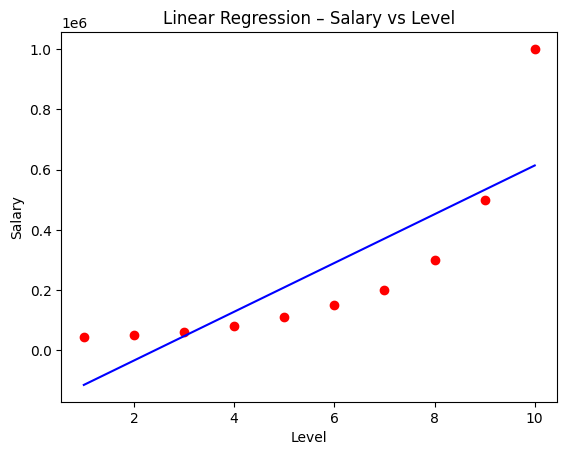

In [12]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title("Linear Regression – Salary vs Level")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()





In [14]:
#Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression()

In [16]:
poly_pred = poly_reg.predict(poly.transform([[6.5]]))
print("Polynomial Model Salary Prediction:", round(poly_pred[0], 2))


Polynomial Model Salary Prediction: 158862.45


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


/tmp/ipython-input-3360691810.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X.values), max(X.values), 0.1)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


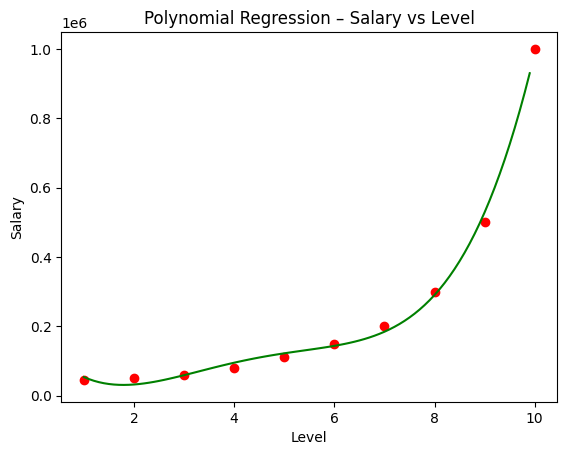

In [17]:
X_grid = np.arange(min(X.values), max(X.values), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color='red')
plt.plot(X_grid, poly_reg.predict(poly.transform(X_grid)), color='green')
plt.title("Polynomial Regression – Salary vs Level")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()


In [18]:
# Linear Model Metrics
lin_r2 = r2_score(y, lin_reg.predict(X))
lin_rmse = np.sqrt(mean_squared_error(y, lin_reg.predict(X)))

# Polynomial Model Metrics
poly_r2 = r2_score(y, poly_reg.predict(X_poly))
poly_rmse = np.sqrt(mean_squared_error(y, poly_reg.predict(X_poly)))

print("Linear R²:", round(lin_r2, 3))
print("Linear RMSE:", round(lin_rmse, 2))
print("Polynomial R²:", round(poly_r2, 3))
print("Polynomial RMSE:", round(poly_rmse, 2))


Linear R²: 0.669
Linear RMSE: 163388.74
Polynomial R²: 0.997
Polynomial RMSE: 14503.23
